In [102]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [103]:
import numpy as np
import pandas as pd
import seaborn as sns

In [129]:
df=pd.read_csv('C:/Users/G V Swetha/Desktop/country_data.csv')

In [130]:
x=df['country']
df.drop(['country'], axis='columns', inplace=True)


In [131]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scld=MinMaxScaler(feature_range=(0,1))
arr_scld=scld.fit_transform(df)
df_scld=pd.DataFrame(arr_scld,columns=df.columns)
df_scld.head()
df_scld.describe()
df_scld.shape
import warnings
warnings.filterwarnings('ignore')


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.173661,0.205112,0.311106,0.269207,0.132933,0.110820,0.758495,0.283591,0.121536
std,0.196343,0.137135,0.170717,0.139188,0.154980,0.097687,0.175408,0.238777,0.174944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027507,0.118520,0.193288,0.173250,0.022076,0.055633,0.654832,0.101735,0.010490
50%,0.081305,0.174550,0.280298,0.248566,0.075174,0.088716,0.808679,0.198738,0.042274
75%,0.289679,0.256345,0.422001,0.337393,0.178397,0.138250,0.881657,0.430599,0.131900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(167, 9)

In [107]:
from sklearn.cluster import KMeans
num_of_clusters = range(2,10)
error=[]
for num_clusters in num_of_clusters:
    clusters=KMeans(num_clusters)
    clusters.fit(df_scld)
    error.append(clusters.inertia_/100)
    

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

In [108]:
df_clust=pd.DataFrame({"cluster_Numbers":num_of_clusters,"Error_Term":error})

In [109]:
df_clust

,cluster_Numbers,Error_Term
0,2,0.259432
1,3,0.193451
2,4,0.167810
3,5,0.149668
4,6,0.136625
5,7,0.124161
6,8,0.113487
7,9,0.106407


In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(df.cluster_Numbers,df.Error_Term,marker="D",color="#a51347")
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Find the optimal number of Cluster")
plt.show()
          

<Figure size 720x720 with 0 Axes>

AttributeError: 'DataFrame' object has no attribute 'cluster_Numbers'

<Figure size 720x720 with 0 Axes>

In [ ]:
clusters=KMeans(3)
clusters.fit(df_scld)
clusters.labels_

In [ ]:
df['Cluster']=pd.Series(clusters.labels_)
clusters.labels_

In [ ]:
df

In [ ]:
df_clust.to_csv('final_cluster.csv')

In [ ]:
df_clust.shape

In [ ]:
clust_profile=pd.pivot_table(df,values=df.columns,index='Cluster',aggfunc=np.mean)
np.round(clust_profile,2)
df.groupby("Cluster").size()

In [132]:
# Build Clusters
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

dist = linkage(df_scld, 'ward')
type(dist)
dist.shape
dist[0:1]

numpy.ndarray

(166, 4)

array([[4.10000000e+01, 1.21000000e+02, 4.29785909e-02, 2.00000000e+00]])

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'Cluster')

Text(0, 0.5, 'Distance')

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

pandas.core.series.Series

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [72.5, 72.5, 103.75, 103.75],
  [50.0, 50.0, 88.125, 88.125],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [142.5, 142.5, 172.5, 172.5],
  [69.0625, 69.0625, 157.5, 157.5],
  [13.75, 13.75, 113.28125, 113.28125],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [225.0, 225.0, 243.75, 243.75],
  [215.0, 215.0, 234.375, 234.375],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 320.0, 342.5, 342.5],
  [365.0, 365.0, 375.0, 375.0],
  [395.0, 395.0, 405.0, 405.0],
  [385.0

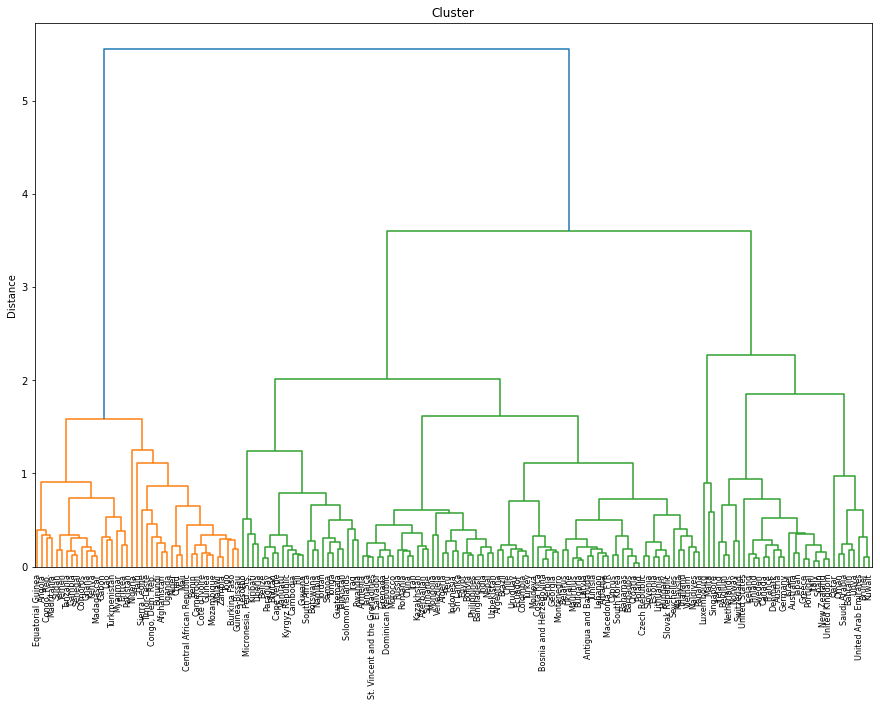

In [135]:
plt.figure(figsize = (15,10))
plt.title('Cluster')
plt.ylabel ('Distance')
x
type(x)
dendrogram(dist, labels=list(x),leaf_font_size= 8, leaf_rotation= 90)
plt.show()

In [124]:
lbl = fcluster(dist, 3, criterion= 'distance')
type(lbl)
print (lbl)

numpy.ndarray

[1 2 2 1 2 2 2 3 3 2 2 3 2 2 2 3 2 1 2 2 2 2 2 3 2 1 1 2 1 3 2 1 1 2 2 2 1
 1 1 2 1 2 2 2 3 2 2 2 2 1 1 2 2 3 3 1 1 2 3 1 3 2 2 1 1 2 1 2 3 2 2 2 2 3
 3 3 2 3 2 2 1 2 3 2 1 2 2 2 2 3 2 3 2 1 1 2 2 1 3 1 2 2 2 2 2 2 1 1 2 2 3
 3 1 1 3 3 1 2 2 2 2 2 3 3 2 2 2 2 3 1 2 2 1 3 2 2 2 2 2 3 2 2 1 2 3 3 2 1
 2 1 1 2 2 2 1 1 2 3 3 3 2 2 2 2 2 1 1]


In [125]:
df['Cluster_Ward'] = lbl

In [126]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Ward
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [127]:
clust_profile = pd.pivot_table(df, values=df.columns , index = 'Cluster_Ward', aggfunc=np.mean)
np.round(clust_profile,2)
df.groupby("Cluster_Ward").size()

,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
Cluster_Ward,,,,,,,,,
1,97.10,29.35,1680.73,5.55,37.97,3569.10,12.81,59.68,5.13
2,23.99,39.92,6829.39,6.76,50.12,11943.80,6.90,71.92,2.37
3,5.96,58.51,43170.59,8.50,48.90,47588.24,4.12,79.98,1.89


Cluster_Ward
1    41
2    92
3    34
dtype: int64